##LOADING LIBRARIES

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
df=pd.read_csv("Loan.csv")

In [ ]:
df.head()

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,9BD1KD2KEF,65,129748,222973,536,54,1,5.46,60,0.38,PhD,Self-employed,Single,No,No,Auto,No,0
1,9KVMYAJ2DS,66,105494,142070,618,97,3,9.19,48,0.52,Bachelor's,Part-time,Single,No,No,Business,No,0
2,M9P35J6Z05,49,87507,104287,783,51,4,23.28,48,0.50,PhD,Full-time,Married,Yes,Yes,Auto,Yes,0
3,NYABC1VNC6,24,86964,30938,507,61,1,24.71,12,0.16,High School,Self-employed,Married,No,No,Home,Yes,1
4,DV5JBPN1UE,45,120774,16348,623,29,2,16.85,60,0.33,High School,Unemployed,Single,No,Yes,Business,Yes,0


## DATA CLEANING

#### Checking for missing values

In [ ]:
df.isnull().sum()

,0
LoanID,0
Age,0
Income,0
LoanAmount,0
CreditScore,0
MonthsEmployed,0
NumCreditLines,0
InterestRate,0
LoanTerm,0
DTIRatio,0


In [ ]:
df.shape

(11999, 18)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11999 entries, 0 to 11998
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   LoanID          11999 non-null  object 
 1   Age             11999 non-null  int64  
 2   Income          11999 non-null  int64  
 3   LoanAmount      11999 non-null  int64  
 4   CreditScore     11999 non-null  int64  
 5   MonthsEmployed  11999 non-null  int64  
 6   NumCreditLines  11999 non-null  int64  
 7   InterestRate    11999 non-null  float64
 8   LoanTerm        11999 non-null  int64  
 9   DTIRatio        11999 non-null  float64
 10  Education       11999 non-null  object 
 11  EmploymentType  11999 non-null  object 
 12  MaritalStatus   11999 non-null  object 
 13  HasMortgage     11999 non-null  object 
 14  HasDependents   11999 non-null  object 
 15  LoanPurpose     11999 non-null  object 
 16  HasCoSigner     11999 non-null  object 
 17  Default         11999 non-null 

##Check is there any Data Inconsistency or Inappropriate values

In [ ]:
categorical_cols=df.select_dtypes(include=["object"]).columns
categorical_cols=[col for col in categorical_cols if col!='LoanID']
for cols in categorical_cols:
  print(f"{cols} includes : {df[cols].unique()}\n")

Education includes : ['PhD' "Bachelor's" 'High School' "Master's"]

EmploymentType includes : ['Self-employed' 'Part-time' 'Full-time' 'Unemployed']

MaritalStatus includes : ['Single' 'Married' 'Divorced']

HasMortgage includes : ['No' 'Yes']

HasDependents includes : ['No' 'Yes']

LoanPurpose includes : ['Auto' 'Business' 'Home' 'Other' 'Education']

HasCoSigner includes : ['No' 'Yes']



##Correcting DataTypes

In [ ]:
df.dtypes

,0
LoanID,object
Age,int64
Income,int64
LoanAmount,int64
CreditScore,int64
MonthsEmployed,int64
NumCreditLines,int64
InterestRate,float64
LoanTerm,int64
DTIRatio,float64


#### Dropping Loan_ID as it cant contribute in model making  

In [ ]:
df=df.drop('LoanID',axis=1)

In [ ]:
df['Default'].value_counts()

,count
Default,
0,10639
1,1360


##Checking For Duplicates

In [ ]:
df.duplicated().sum()

np.int64(0)

## Univariate Analysis

#### Outlier Detection

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5]),
 [Text(0, 0.5, 'count'),
  Text(0, 1.5, 'mean'),
  Text(0, 2.5, 'std'),
  Text(0, 3.5, 'min'),
  Text(0, 4.5, '25%'),
  Text(0, 5.5, '50%'),
  Text(0, 6.5, '75%'),
  Text(0, 7.5, 'max')])

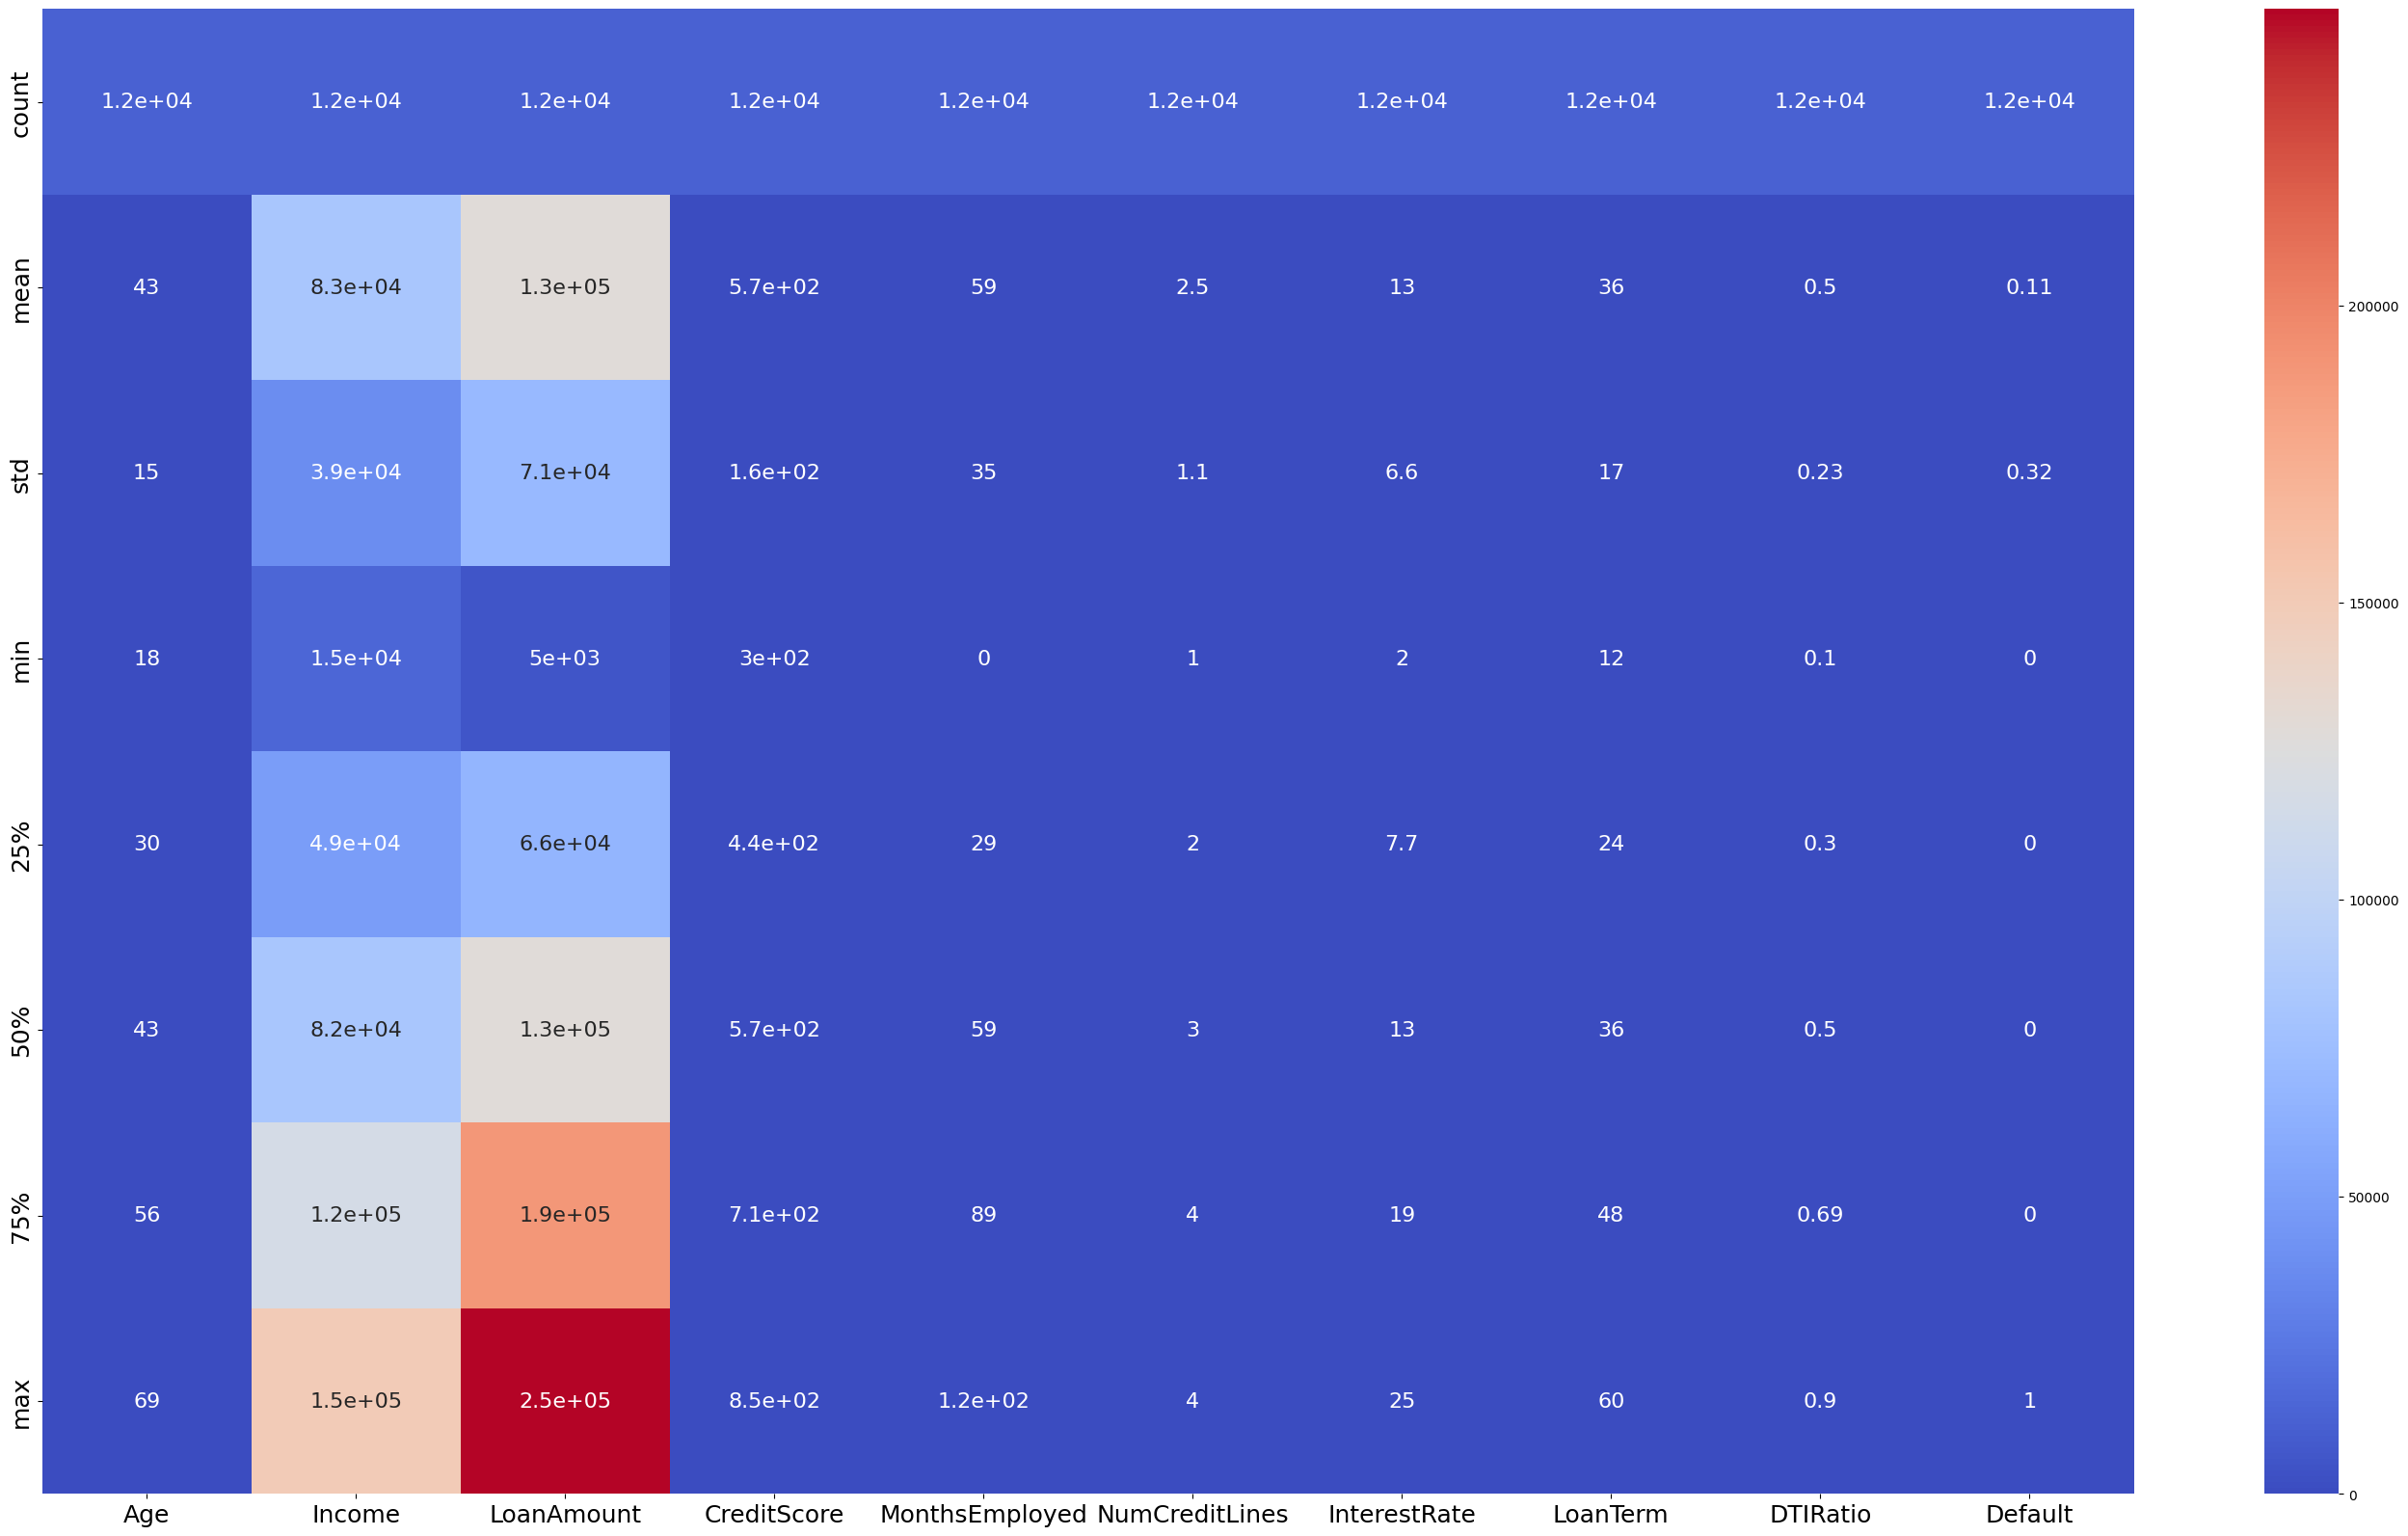

In [ ]:
numeric_cols=df.select_dtypes(include=['number'])
summary_stats=numeric_cols.describe()
plt.figure(figsize=(35,20))
sns.heatmap(summary_stats,annot=True,cmap='coolwarm',annot_kws={"size":16})
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)


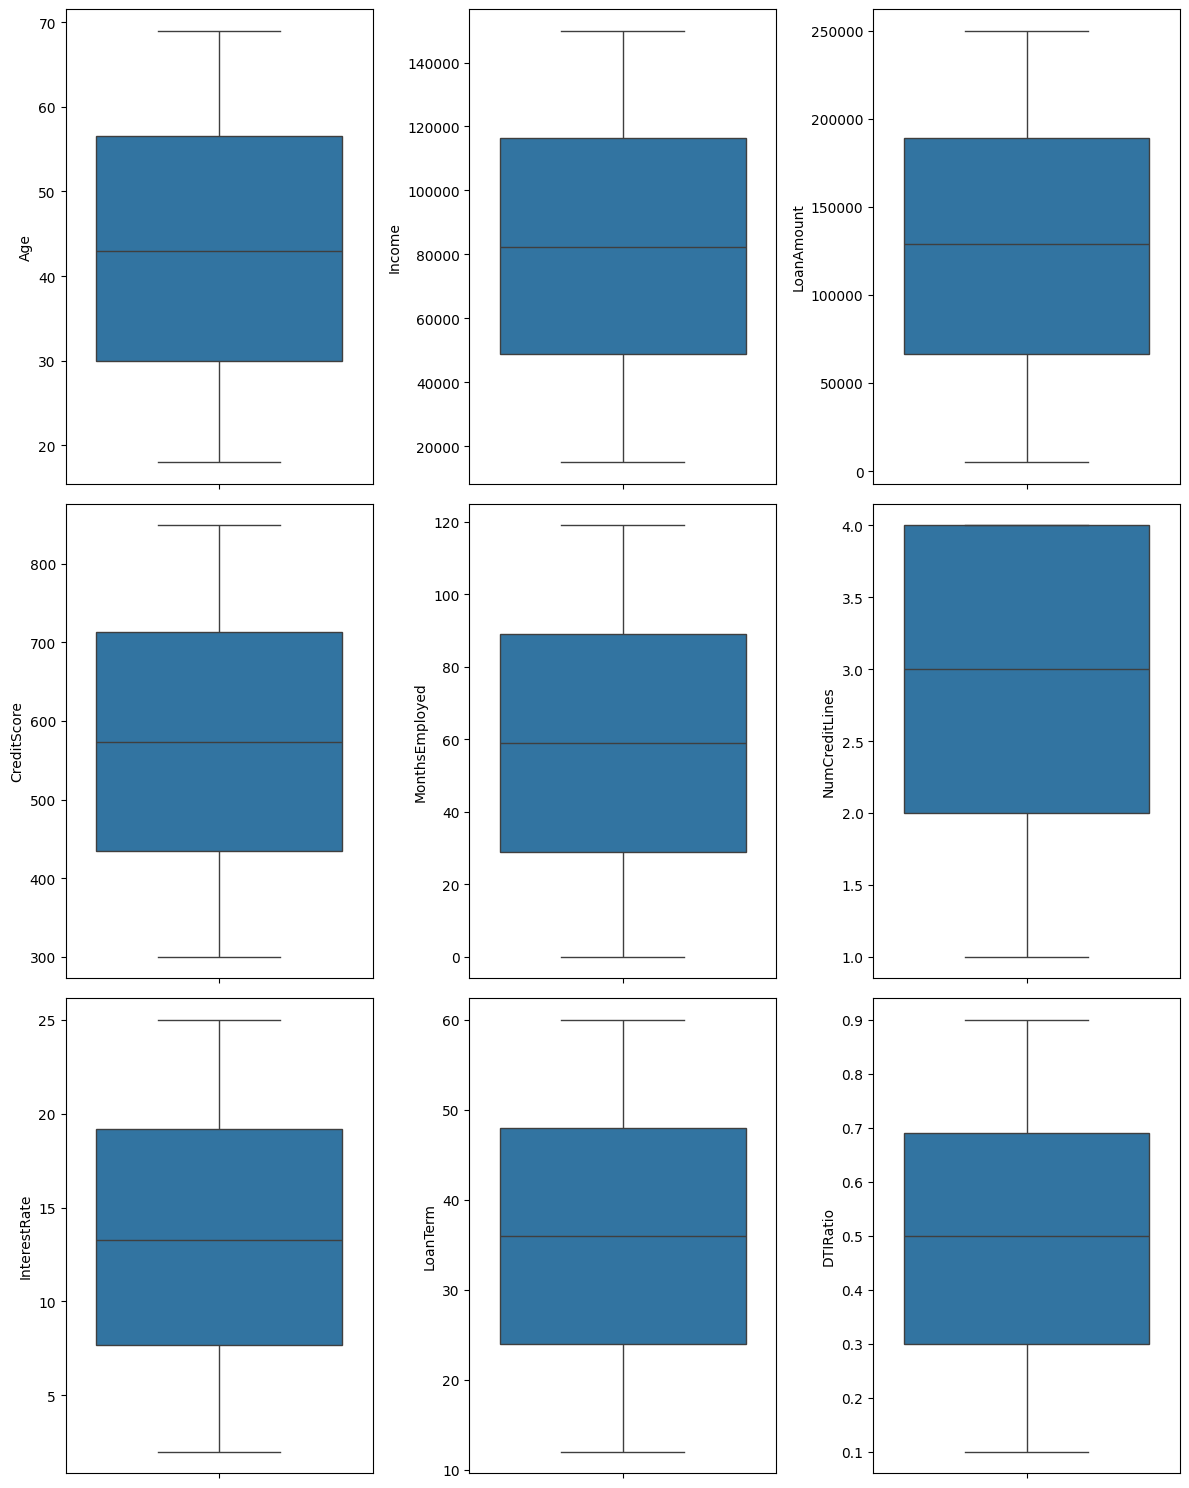

In [ ]:
numerical_cols=df.select_dtypes(include=['number']).columns
numerical_cols=[col for col in numerical_cols if col !='Default']
fig,axes=plt.subplots(3,3,figsize=(12,15))
axes=axes.flatten()
for i,column in enumerate(numerical_cols):
  sns.boxplot(data=df,y=column,ax=axes[i])
plt.tight_layout()


In [ ]:
df.head(3)

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,65,129748,222973,536,54,1,5.46,60,0.38,PhD,Self-employed,Single,No,No,Auto,No,0
1,66,105494,142070,618,97,3,9.19,48,0.52,Bachelor's,Part-time,Single,No,No,Business,No,0
2,49,87507,104287,783,51,4,23.28,48,0.50,PhD,Full-time,Married,Yes,Yes,Auto,Yes,0


#### Checking Skewness

In [ ]:
numeric_cols.skew()

,0
Age,0.004396
Income,-0.009167
LoanAmount,-0.016626
CreditScore,0.001316
MonthsEmployed,0.011384
NumCreditLines,-0.011942
InterestRate,0.028387
LoanTerm,-0.011075
DTIRatio,0.001858
Default,2.439695


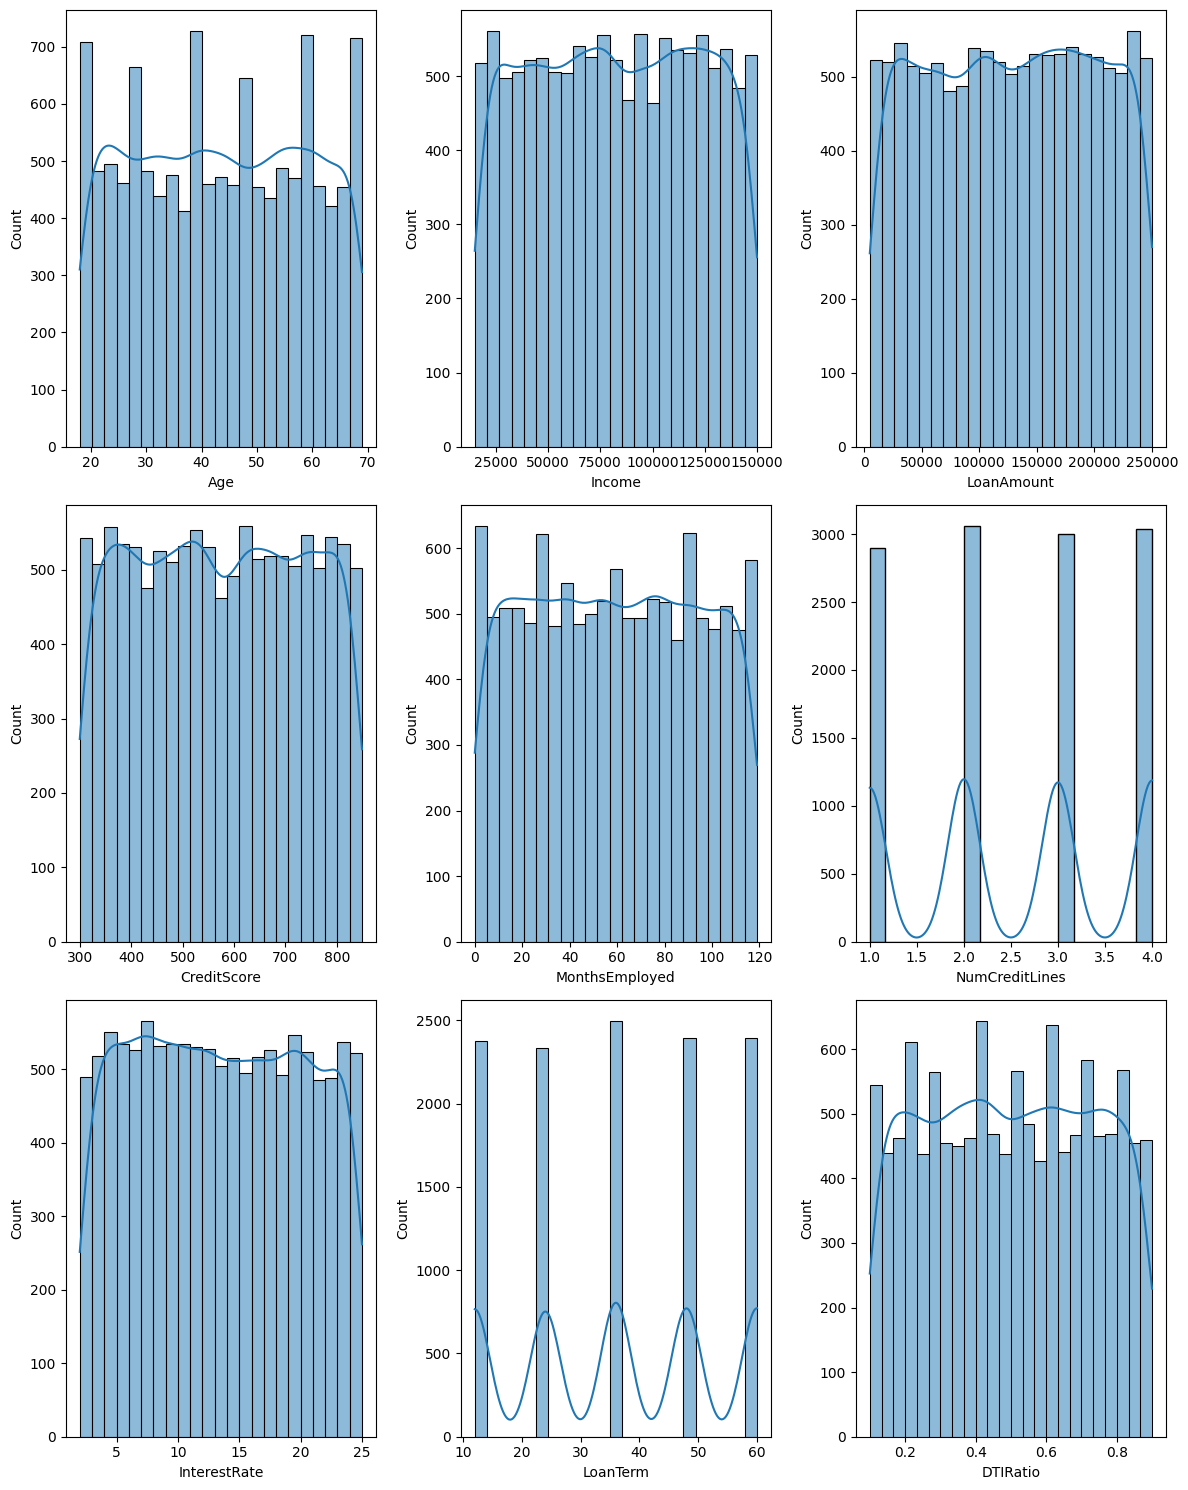

In [ ]:
figs,axes=plt.subplots(3,3,figsize=(12,15))
axes=axes.flatten()
for i,cols in enumerate(numerical_cols):
  sns.histplot(df,x=cols,kde=True,ax=axes[i])
plt.tight_layout()

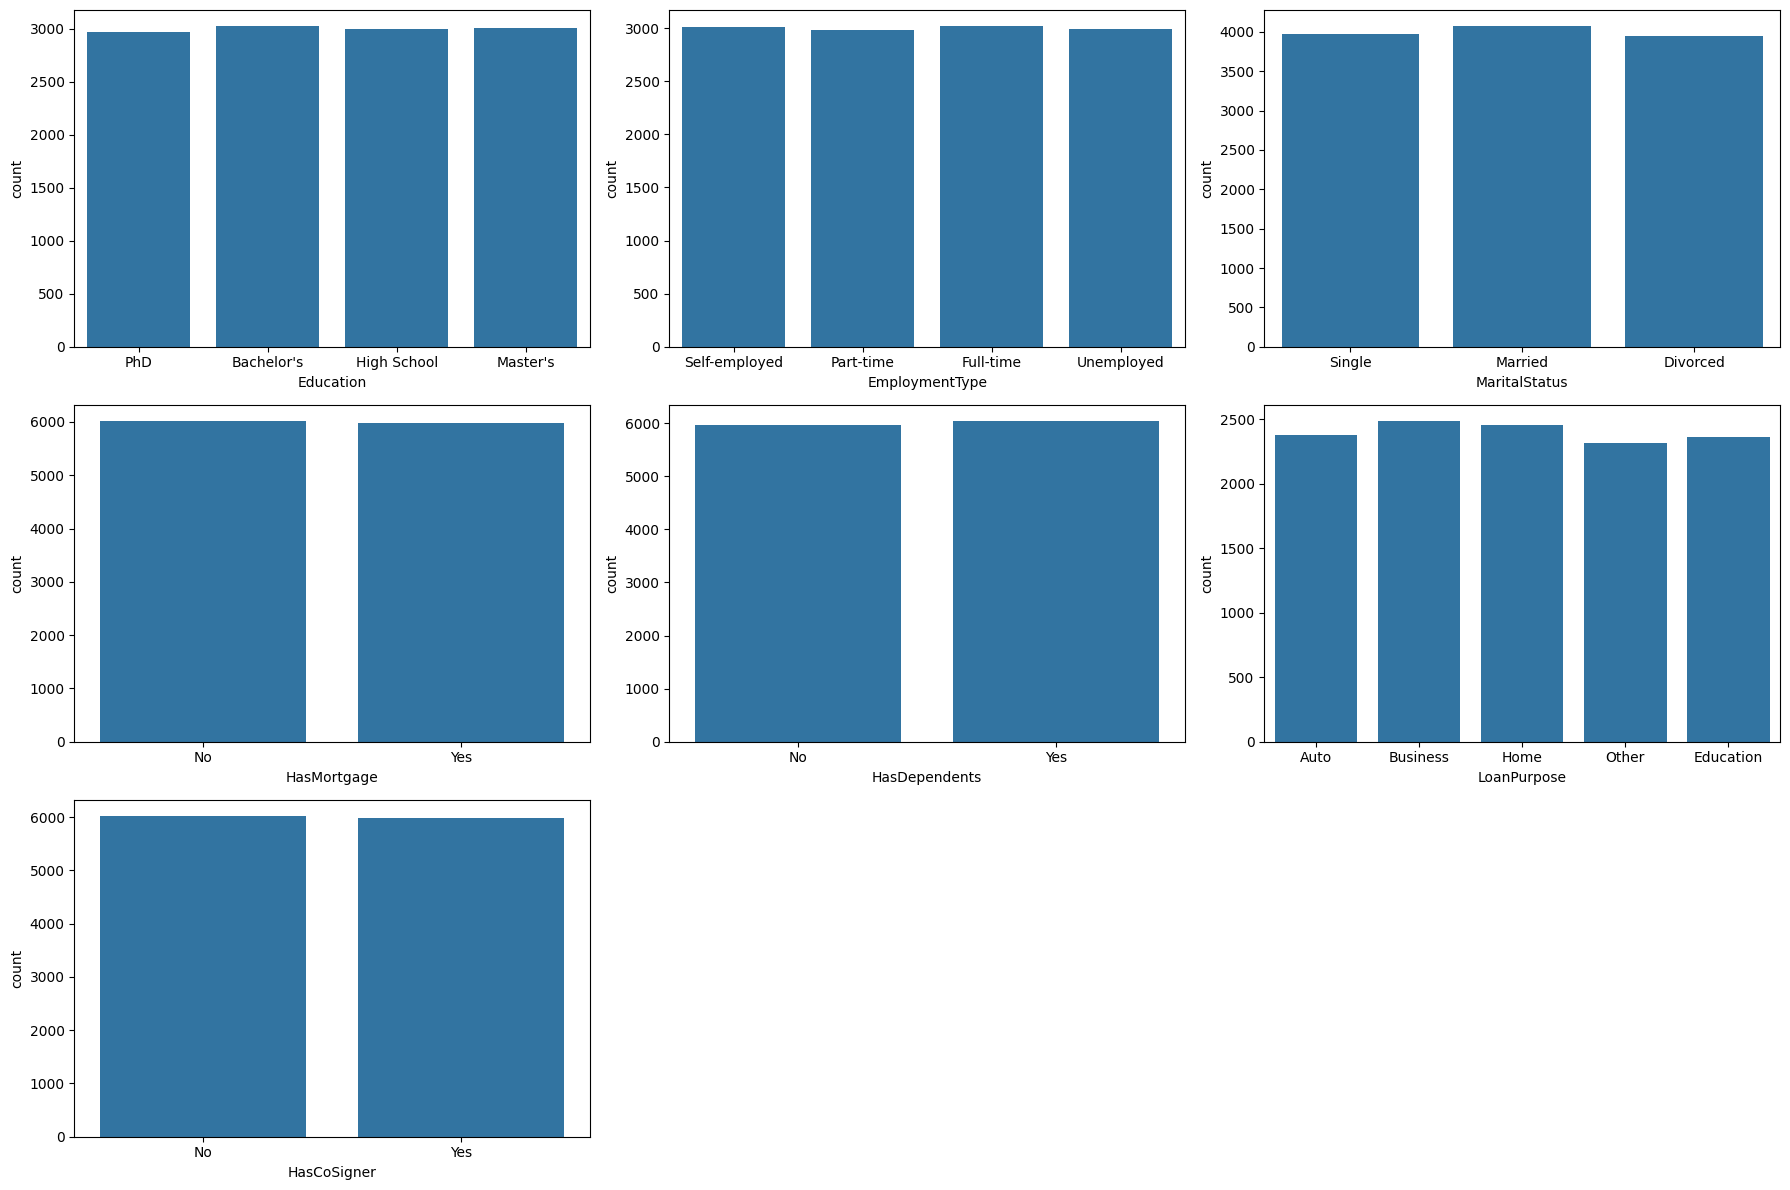

In [ ]:
figs,axes=plt.subplots(3,3,figsize=(18,12))
axes=axes.flatten()
for i,col in enumerate(categorical_cols):
  sns.countplot(df,x=col,ax=axes[i])
for j in range(len(categorical_cols),len(axes)):
  plt.delaxes()
plt.tight_layout()


## Bivaraite Analysis

In [ ]:
df.columns

Index(['Age', 'Income', 'LoanAmount', 'CreditScore', 'MonthsEmployed',
       'NumCreditLines', 'InterestRate', 'LoanTerm', 'DTIRatio', 'Education',
       'EmploymentType', 'MaritalStatus', 'HasMortgage', 'HasDependents',
       'LoanPurpose', 'HasCoSigner', 'Default'],
      dtype='object')

Text(0.5, 1.0, 'Total Income vs Loan Amount')

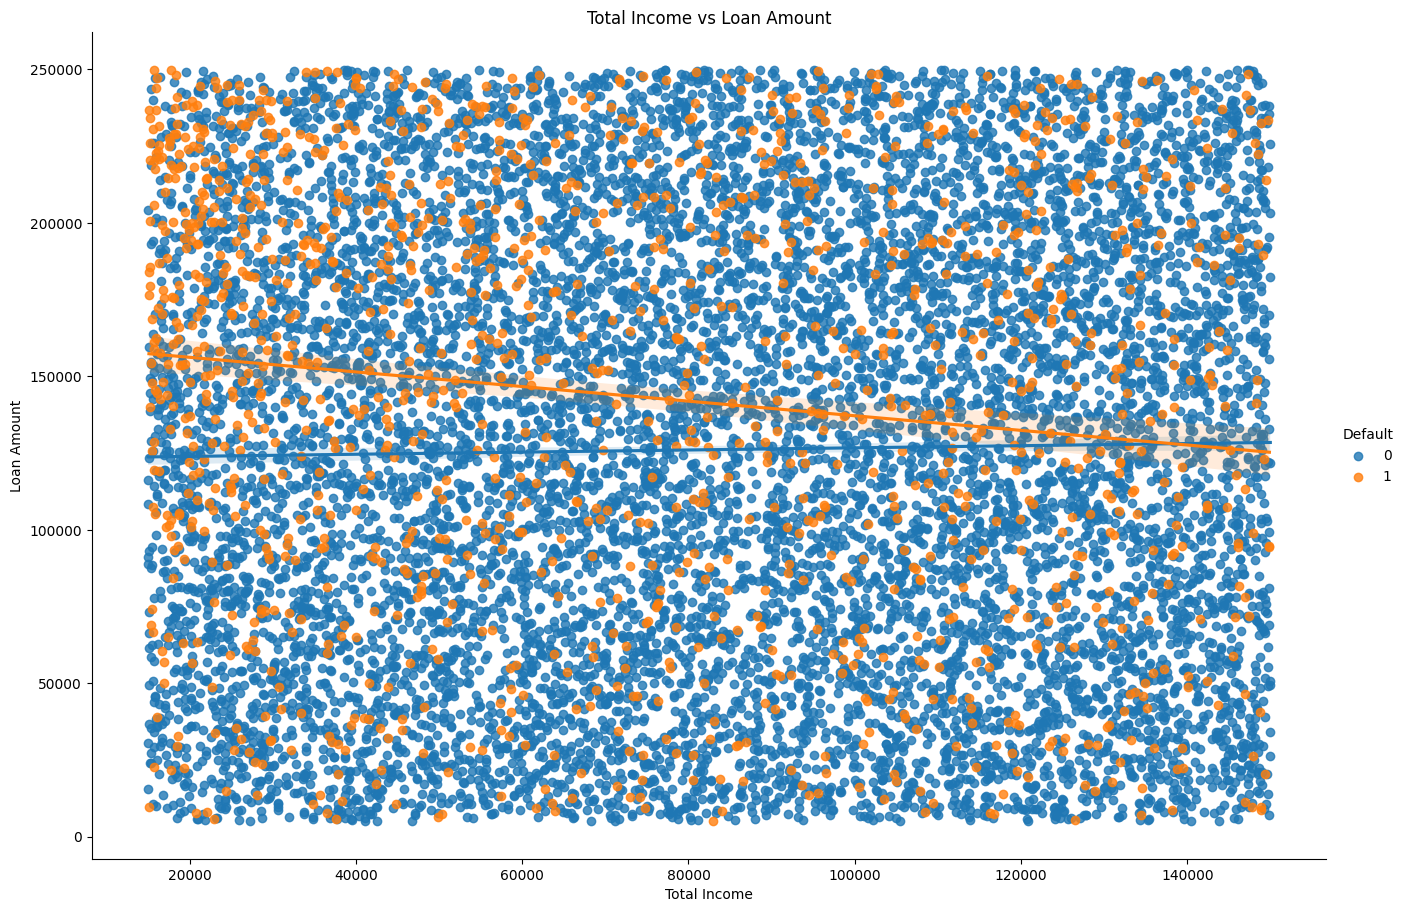

In [ ]:
sns.lmplot(x='Income',y='LoanAmount',hue='Default',data=df,height=9, aspect=1.5)
plt.xlabel("Total Income")
plt.ylabel("Loan Amount")
plt.title("Total Income vs Loan Amount")


Text(0.5, 1.0, 'Age vs Income')

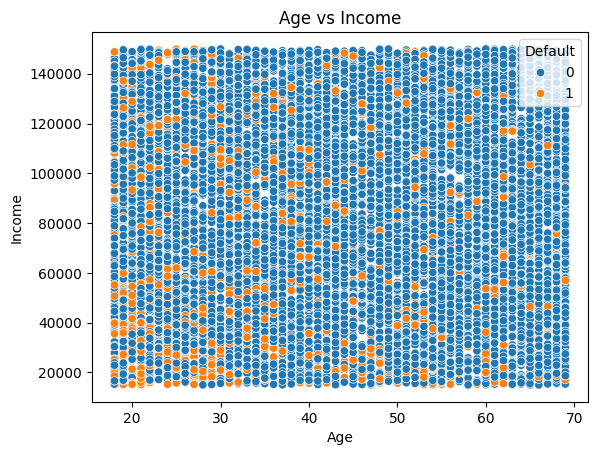

In [ ]:
sns.scatterplot(x='Age',y='Income',data=df,hue='Default')
plt.xlabel("Age")
plt.ylabel("Income")
plt.title("Age vs Income")

Text(0.5, 1.0, 'Age vs Income')

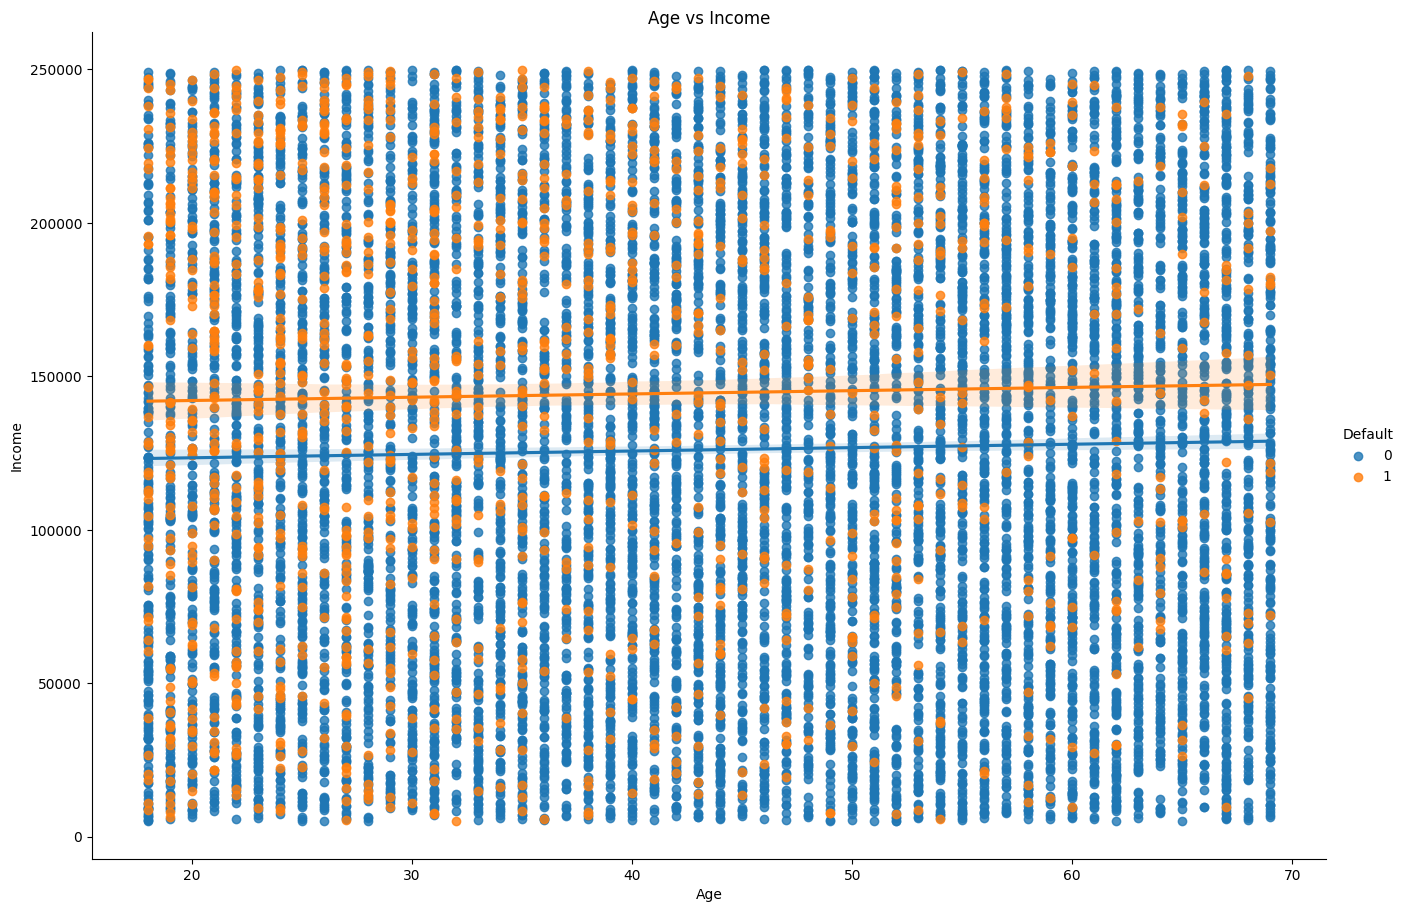

In [ ]:
sns.lmplot(x='Age',y='LoanAmount',data=df,hue='Default',height=9,aspect=1.5)
plt.xlabel("Age")
plt.ylabel("Income")
plt.title("Age vs Income")

Text(0.5, 0, 'LoanPurpose')

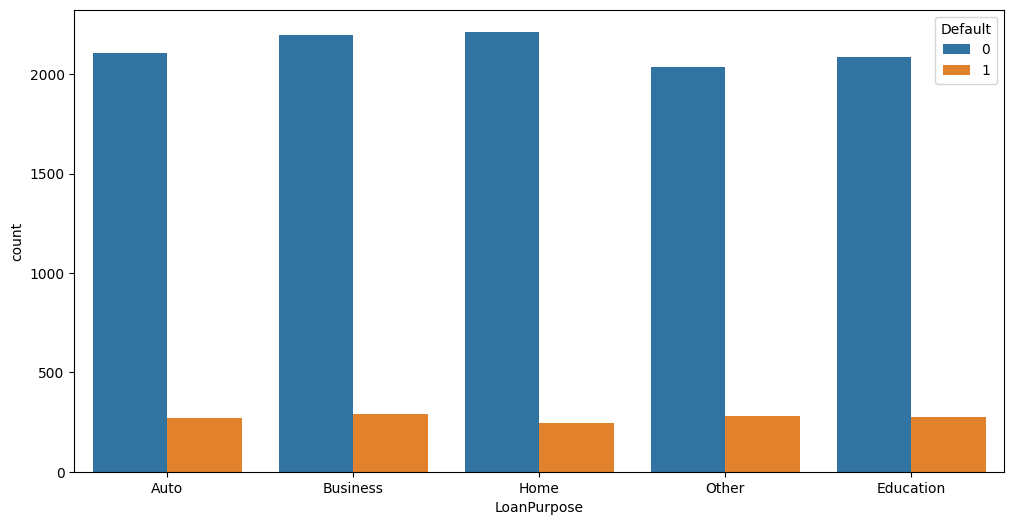

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(x='LoanPurpose',hue='Default',data=df)
plt.xlabel("LoanPurpose")


Text(0.5, 0, 'Employment Type')

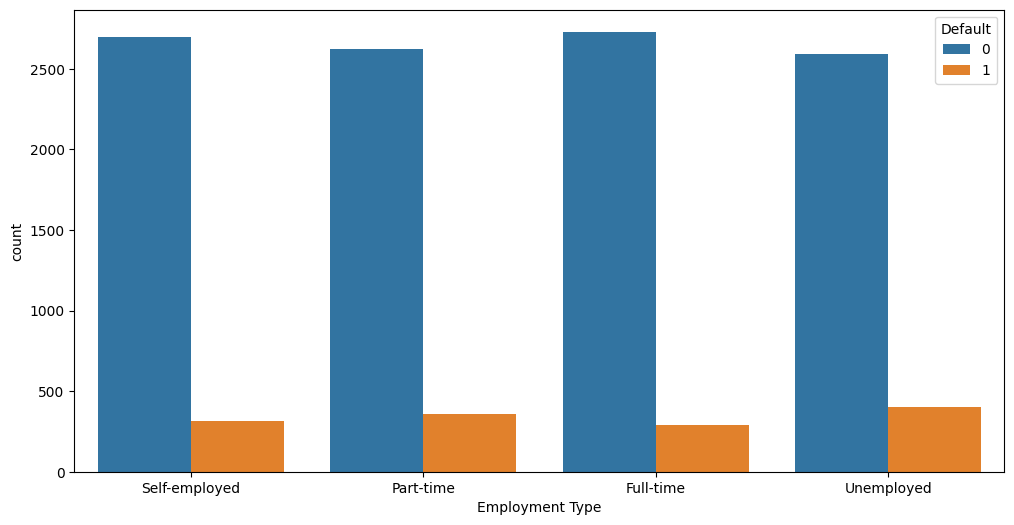

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(data=df,x='EmploymentType',hue='Default')
plt.xlabel("Employment Type")

<Axes: xlabel='Default', ylabel='MaritalStatus'>

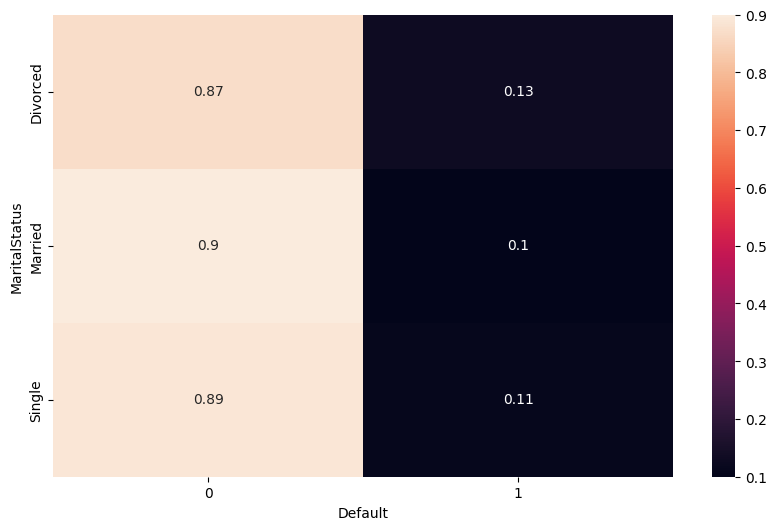

In [ ]:
crosstab=np.round(pd.crosstab(df['MaritalStatus'], df['Default'], normalize='index'),2)
plt.figure(figsize=(10,6))
sns.heatmap(crosstab,annot=True)

<Axes: xlabel='Default', ylabel='HasMortgage'>

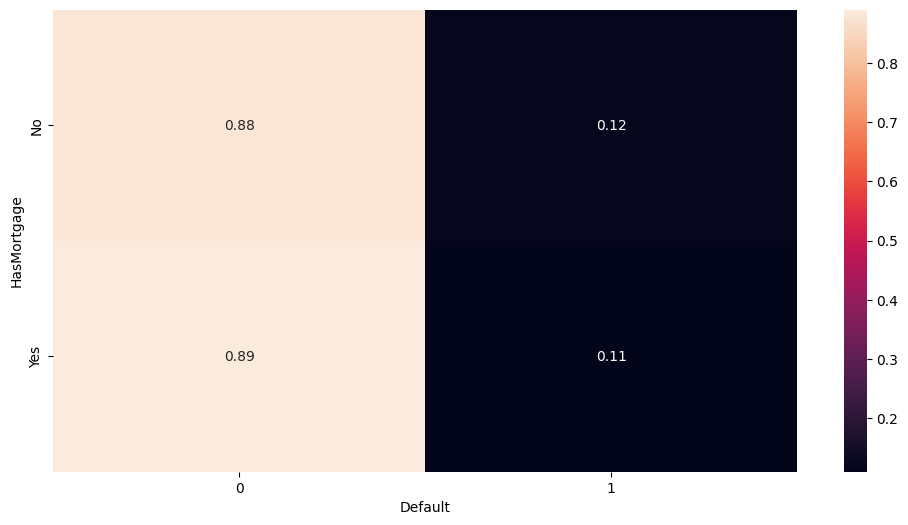

In [ ]:
plt.figure(figsize=(12,6))
crosstab=np.round(pd.crosstab(df['HasMortgage'],df['Default'],normalize='index'),2)
sns.heatmap(data=crosstab,annot=True)

<Axes: xlabel='Default', ylabel='HasDependents'>

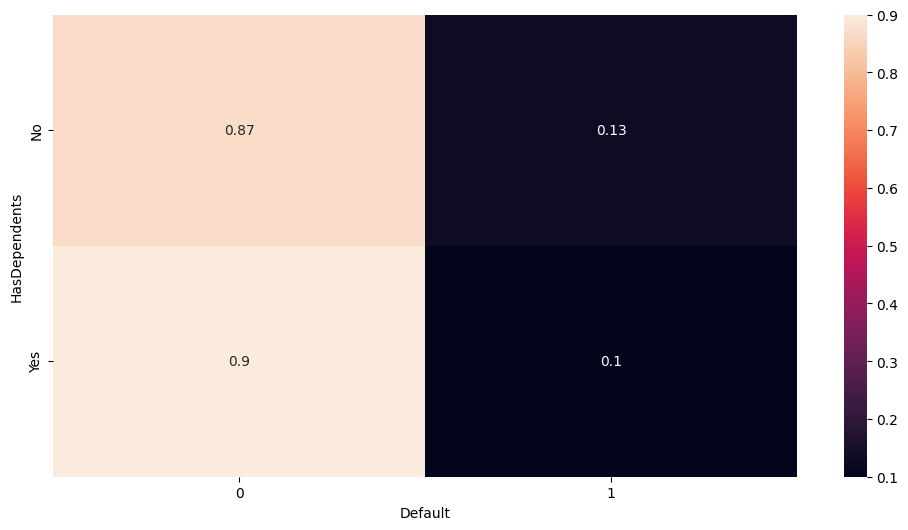

In [ ]:
plt.figure(figsize=(12,6))
crosstab=np.round(pd.crosstab(df['HasDependents'],df['Default'],normalize='index'),2)
sns.heatmap(data=crosstab,annot=True)

## Feature Engineering

In [ ]:
df1=df.copy()

In [ ]:
df['LTI']=df['LoanAmount']/df['Income']

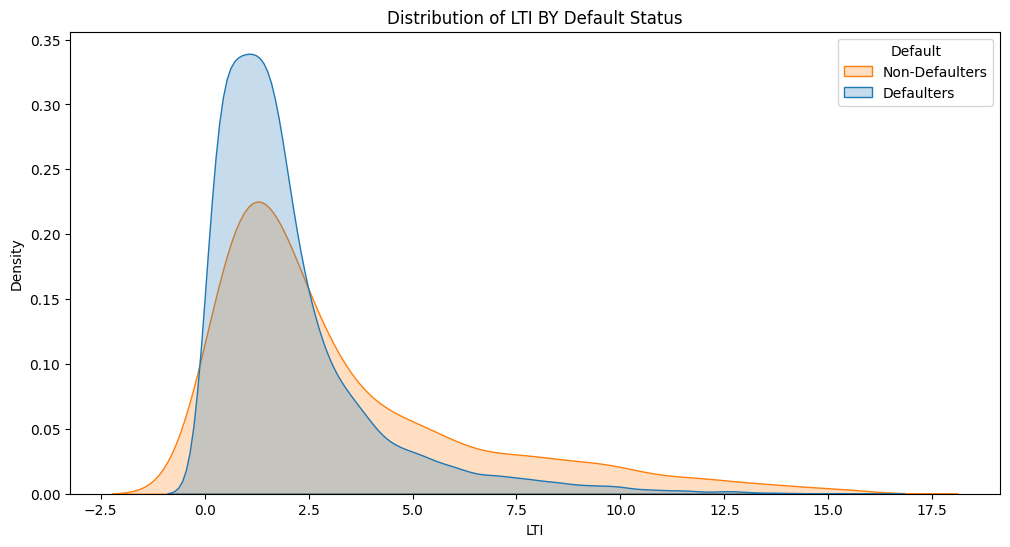

In [ ]:
plt.figure(figsize=(12,6))
sns.kdeplot(data=df,x="LTI",hue="Default",common_norm=False,fill=True)
plt.title("Distribution of LTI BY Default Status")
plt.legend(title="Default",labels=["Non-Defaulters","Defaulters"])

In [ ]:
df["EMI"]=df['LoanAmount']/df['LoanTerm']

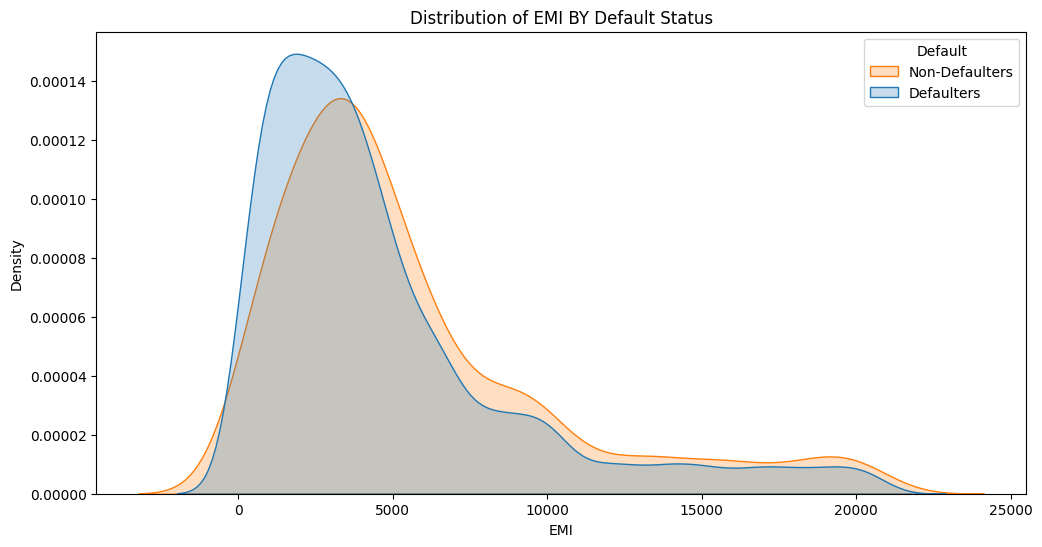

In [ ]:
plt.figure(figsize=(12,6))
sns.kdeplot(data=df,x="EMI",hue="Default",common_norm=False,fill=True)
plt.title("Distribution of EMI BY Default Status")
plt.legend(title="Default",labels=["Non-Defaulters","Defaulters"])

In [ ]:
df["Disposable_Income"]=df['Income']-df['EMI']

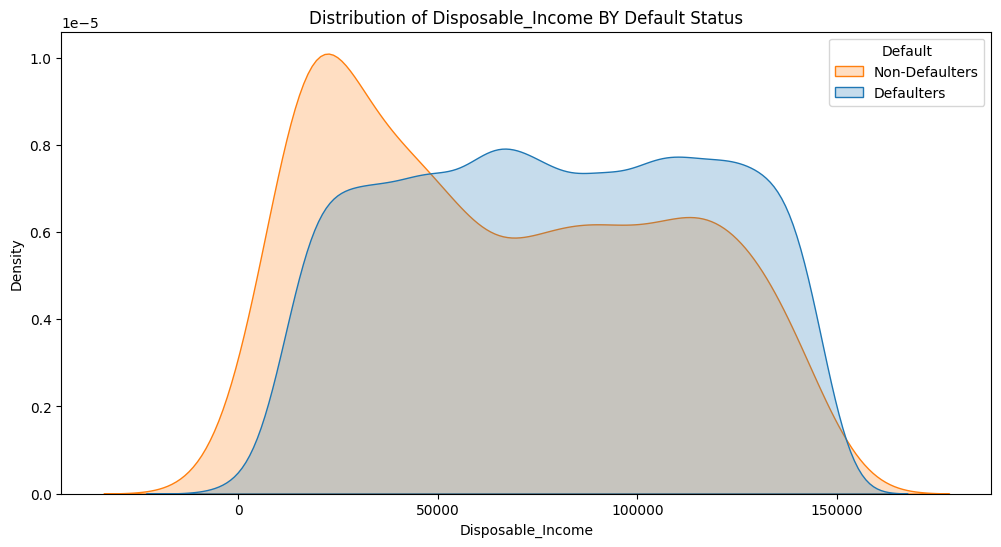

In [ ]:
plt.figure(figsize=(12,6))
sns.kdeplot(data=df,x="Disposable_Income",hue="Default",common_norm=False,fill=True)
plt.title("Distribution of Disposable_Income BY Default Status")
plt.legend(title="Default",labels=["Non-Defaulters","Defaulters"])

In [ ]:
df['Credit_Line_Utilization']=df['LoanAmount']/df['NumCreditLines']

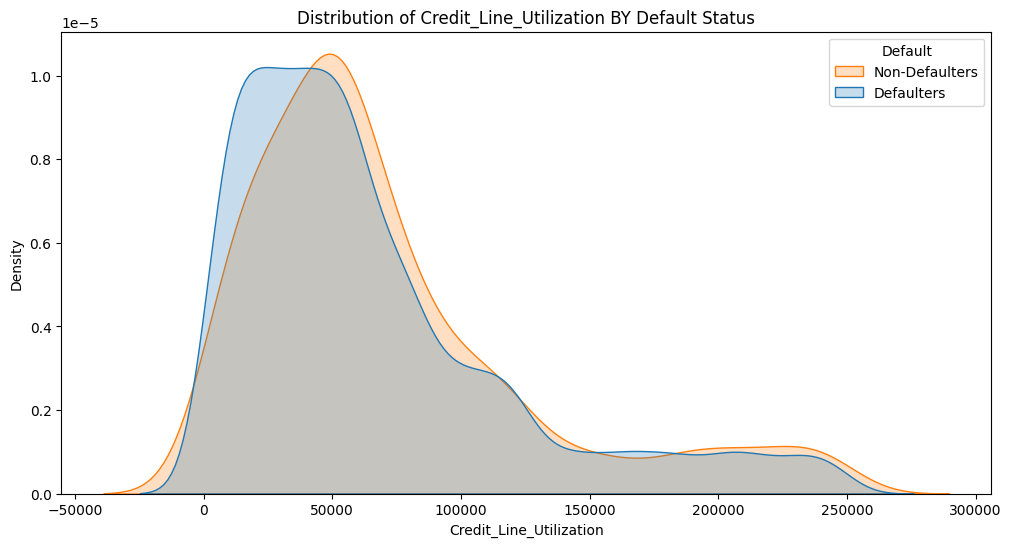

In [ ]:
plt.figure(figsize=(12,6))
sns.kdeplot(data=df,x="Credit_Line_Utilization",hue="Default",common_norm=False,fill=True)
plt.title("Distribution of Credit_Line_Utilization BY Default Status")
plt.legend(title="Default",labels=["Non-Defaulters","Defaulters"])

In [ ]:
df.to_csv("DefaultPrediction.csv",index=False)